In [1]:
from pytesseract import Output
import numpy as np
import pytesseract
import imutils
import cv2
import os
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import time

In [2]:
from tensorflow.keras.models import load_model
start_time = time.time()
from helper_functions import improve_quality
end_time = time.time()
print("process took : ", end_time-start_time)

process took :  0.000997781753540039


In [3]:
current_location = os.getcwd()
srcnn_path=os.path.join(current_location,"assets/models/srcnn.model")
srcnn = load_model(srcnn_path)
image_path = os.path.join(current_location,"testing.jpg")
min_conf = 0.1
distance_thresh = 20
min_size = 1
np.random.seed(42)

In [4]:
image = cv2.imread(image_path)
start_time = time.time()
improved_image = improve_quality(image)
end_time = time.time()
print("process took : ", end_time-start_time)

process took :  141.69086742401123


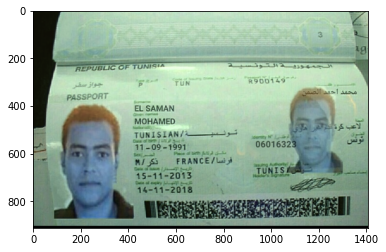

In [6]:
plt.imshow(improved_image)
plt.show()

In [24]:
gray = cv2.cvtColor(improved_image, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 7))
gray = cv2.GaussianBlur(gray, (3, 3), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, kernel)
thresh = cv2.threshold(grad, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.dilate(thresh, None, iterations=3)

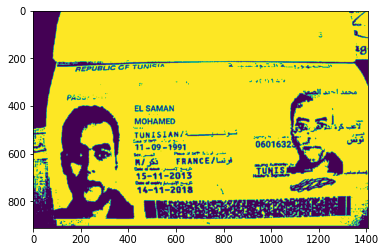

In [21]:
gray = cv2.cvtColor(improved_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY )[1]
plt.imshow(thresh)
plt.show()

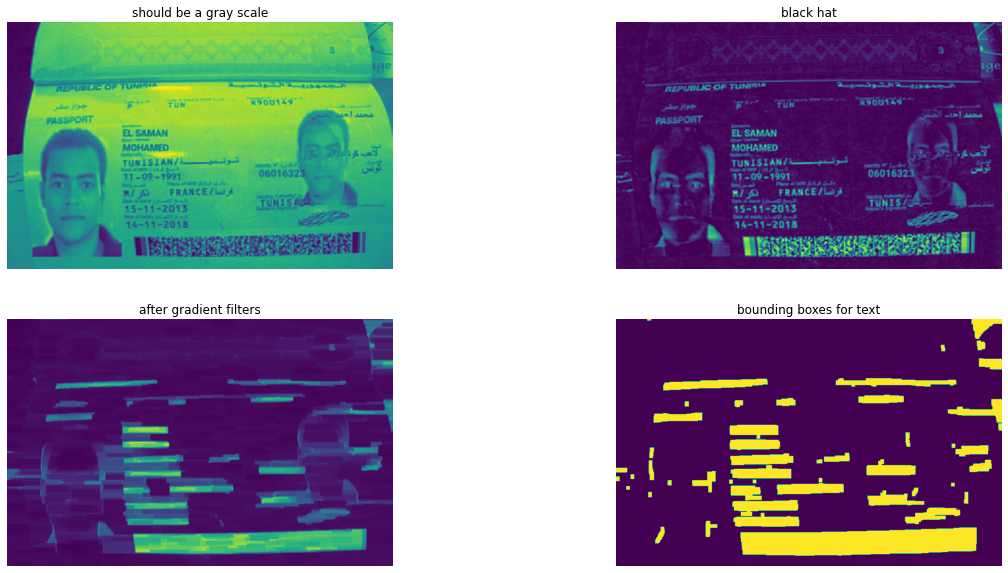

In [25]:
fig = plt.figure(figsize=(20, 10))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(gray)
plt.title('should be a gray scale')
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(blackhat)
plt.axis('off')
plt.title('black hat')
fig.add_subplot(rows, columns, 3)
plt.imshow(grad)
plt.axis('off')
plt.title('after gradient filters')
fig.add_subplot(rows, columns, 4)
plt.imshow(thresh)
plt.axis('off')
plt.title('bounding boxes for text')
plt.show()

In [28]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
boxes=[]
text_objects=[]
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if h*w> 200:
        boxes.append((x, y, w, h))
        info = image[y:y + h, x:x + w]
        text_objects.append(info)

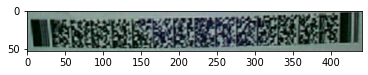

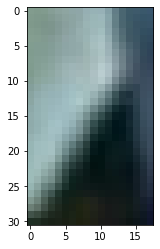

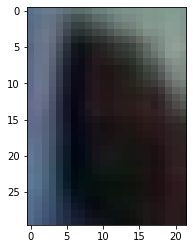

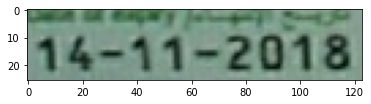

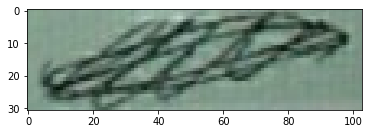

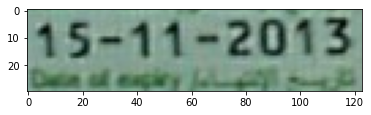

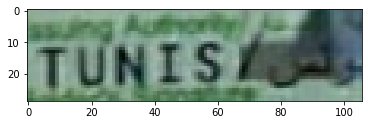

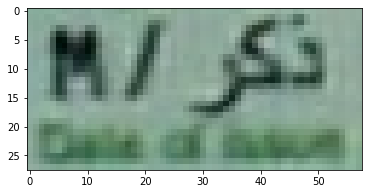

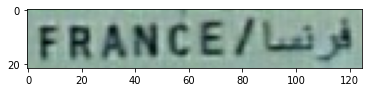

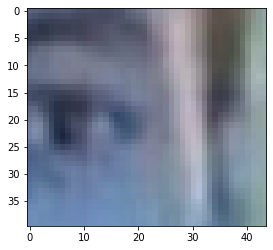

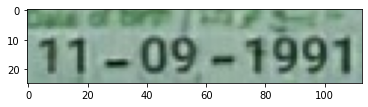

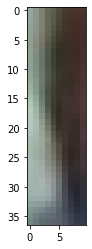

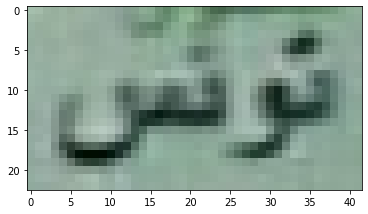

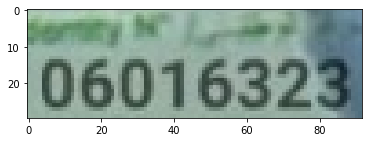

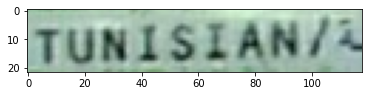

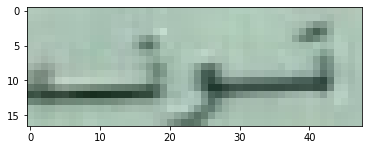

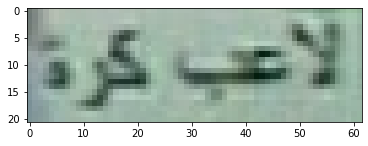

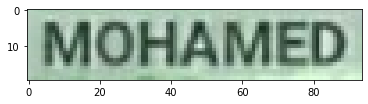

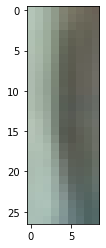

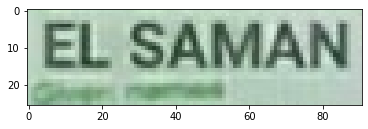

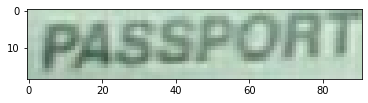

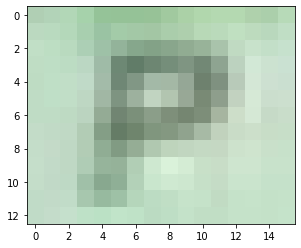

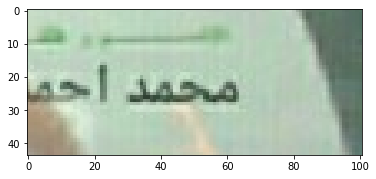

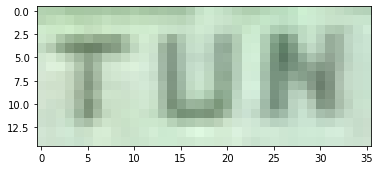

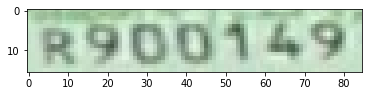

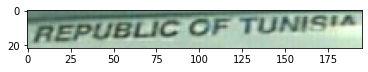

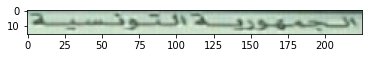

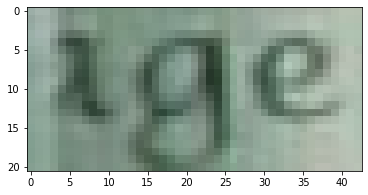

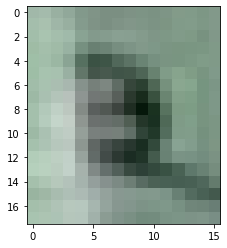

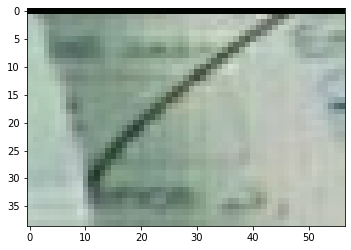

In [29]:
for info in text_objects:
    plt.imshow(info)
    plt.show()

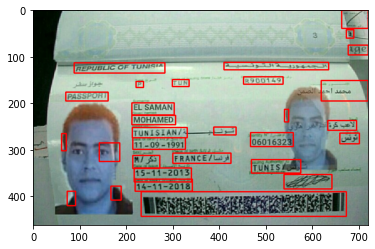

In [30]:
im = image
for box in boxes:
    (x, y, w, h) = box
    cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(im)
plt.show()

In [44]:
options = "--psm 7 -l ara --oem 1"
texts = []
for info in text_objects:
    try:
        (orientation,script) = pytesseract.image_to_string(info, config="--psm 0 --dpi 72")
        texts.append(text)
    except :
        print("no text")

no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text


In [51]:
try:
    (orientation,script) = pytesseract.image_to_string(improved_image, config="--psm 0 --dpi 150")
    print((orientation,script))
except :
    print("e")

NameError: name 'e' is not defined

In [37]:
texts = [t for t in texts if len(t)>2]

In [38]:
texts

['DSS eel\n',
 '14-11-2018\n',
 'LZ\n',
 '15-11-2013\n',
 'TUNIS Meee\n',
 'im) 3\n',
 'IFRANCE/Li |\n',
 'et\n',
 'wer\n',
 '06016324\n',
 '5 5 |\n',
 'aS oY\n',
 'IMOHAMED |\n',
 'EL SAMAN|\n',
 'IPASSPOR |\n',
 'ie |\n',
 'jwise\n',
 'TUN\n',
 '2900149)\n',
 "REPUBLIC OF TUNIS'*\n",
 'eS +> 2554\n',
 'age\n',
 'Ey\n']

In [34]:
options = "--psm 7"
texts = []
for info in text_objects:
    text = pytesseract.image_to_string(info, config=options,lang="ara")
    texts.append(text)

In [35]:
texts

['لاس\n',
 'غم\n',
 '6\n',
 '14-11-2018\n',
 'رك\n',
 '15-11-35\n',
 'زوم ؟ ر برل\n',
 'ا دكر 87\n',
 'افرتسا/ 2 لايم مع\n',
 'اك\n',
 '',
 '١\n',
 'اتوقس|\n',
 '20010033\n',
 '',
 'اتونا\n',
 'لاعب كرة\n',
 '0ع 1م710\n',
 'أ\n',
 'الاذاللة5 اع\n',
 '552011مم\n',
 '|]157 |\n',
 'مجمدادة\n',
 '|30 ل1 1)\n',
 '1 9 0011-59 |\n',
 '*1ل8ل11 017 ل77561181\n',
 '4ه وود ه م\n',
 '1016\n',
 ']0\n',
 '']

In [49]:
text=pytesseract.image_to_string(improved_image)
text

"REPUBLIC OF TUNIS'*\n\nEL SAMAN\n\nMOHAMED\nTUNISLAN/*@——>=>4\ni1- -09- 4991\n\nPreece of beth ie 2 i\nR/§ — FRANCE/LSs\nCate ot amet pe\n\n15-11-2013\n\nCane of engary Jo at\n\n14-11-2018\n"

In [50]:
text=pytesseract.image_to_string(image)
text

"a\nREPUBLIC OF TUNIS'* ogee\n\nEL SAMAN\nMOHAMED\n\nTUNISLAN/\nin 09 1991 06016323\n\nyeryen\nFRANCE /Ls —/\nMe\n\n"